1. Import libraries

In [1]:
import sys
sys.path.append('../')
import utils as ul
import numpy as np
import librosa
import matplotlib.pyplot as plt

2. Define analysis parameters

In [2]:
fs=16000
win_dur = 40e-3
hop_dur = 10e-3
win_size = int(np.ceil(win_dur*fs))
hop_size = int(np.ceil(hop_dur*fs))
n_fft = int(2**(np.ceil(np.log2(win_size))))

3. Load audio, extract onset activations, pitch contour and spectrogram

In [3]:
x_mix,_ = librosa.load('./audios/1/mix.wav', sr=fs)
x_voc,_ = librosa.load('./audios/1/voc.wav', sr=fs)
odf_voc,_ = ul.getODF(audio = x_voc, fs = fs, winSize = win_size, hopSize = hop_size, nFFT = n_fft, source='vocal')
pitch, time = ul.pitchContour(audio=x_voc, sr=fs, minPitch=98, maxPitch=300)
f,t,X = ul.spectrogram(audio=x_voc, sr=fs, winSize=win_size, hopSize=hop_size, nFFT=n_fft)

### I think we should remove the warnings. These are computation function calls anyway, not plotting. So it's nothing to be worried about that the result was not plotted and instead returned
Nithya: I agree, just removed the warning

4. Plot all of them in subplots

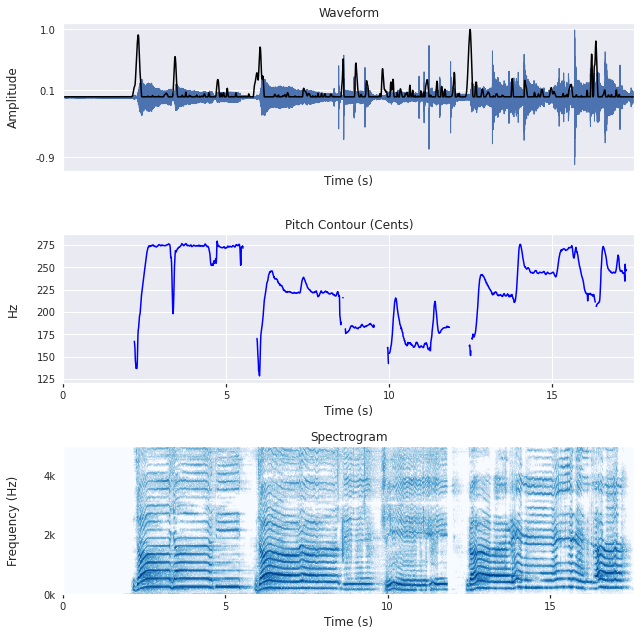

In [4]:
n_subplots=3
fig, ax = ul.generateFig(n_subplots,(9,9),[1/n_subplots]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0])
ul.plotODF(odf=odf_voc, sr=fs, hopSize_odf=hop_size, ax=ax[0], updatePlot=True)
ul.plotPitch(pitch, time, ax=ax[1])
ul.plotSpectrogram(X,t,f,ax=ax[2],annotate=False)

for ax_i in ax:
    ax_i.yaxis.set_label_coords(-0.075,0.5)
plt.tight_layout()

### Again, either we put the warning about duration in all plotting functions or not at all.. I don't think it's necessary to have it. 

### The time axis ticks in pitch plot are different from the other two.. that's weird - Nithya: I fixed that

### I think we can change pitch plot's default y axis to Hz, because I figure that someone using this for the first time will probably not have a metadata file with notes and tonic - maybe I could make this optional: if a tonic is given then in cents, else Hertz. - I agree, done.

5. Plot them in subplots again, this time show x-axis label and tickmarks only in bottom-most plot to avoid duplicates

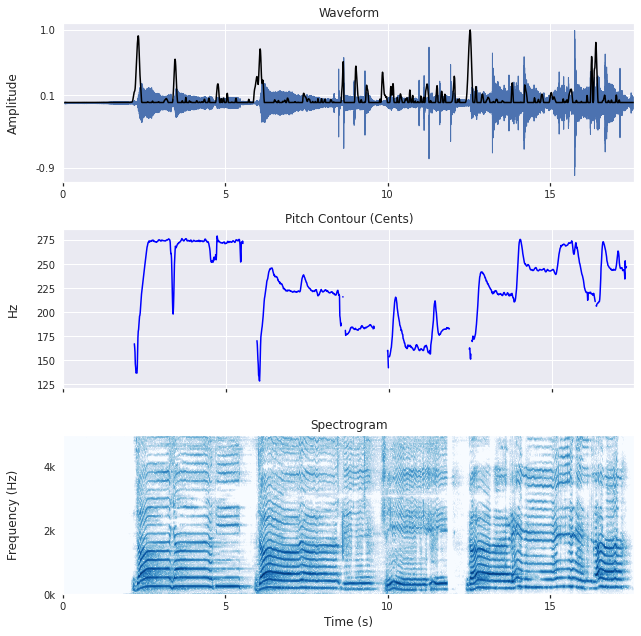

In [5]:
n_subplots=3
fig, ax = ul.generateFig(n_subplots,(9,9),[1/n_subplots]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0], xlabel=False, xticks=False)
ul.plotODF(odf=odf_voc, sr=fs, hopSize_odf=hop_size, ax=ax[0], updatePlot=True)
ul.plotPitch(pitch, time, ax=ax[1], xlabel=False, xticks=False)
ul.plotSpectrogram(X,t,f,ax=ax[2], annotate=False)

for ax_i in ax:
    ax_i.yaxis.set_label_coords(-0.075,0.5)
    #ax_i.tick_params(axis="x", direction="out")
    
plt.tight_layout()

### For some reason, adding the xtick marks back did not work on ax[0] below (line 11 in cell above this plot). Need to debug - this is now fixed.